<a href="https://colab.research.google.com/github/AKA2501/financial_project/blob/master/financial_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convex portfolio optimization and asset allocation using pypfopt 

In [3]:
#Basic imports 
import pandas as pd
import numpy as np
!pip install yfinance

     |████████████████████████████████| 6.4 MB 34.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Downloading the stock prices 

In [4]:
import datetime 
import yfinance as yf

#Selecting the start to be 5yrs from todays date. 
start_date = (datetime.datetime.today()  - datetime.timedelta(weeks = 52*5)).strftime("%Y-%m-%d")

#End date is today.
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

#Getting the adjusted close stock prices of 7 stocks , spanned across 5 industries. 
stock_price = yf.download(tickers = "SHOP AMZN NVDA NFLX CHTR REGN BAC JPM",
                          start = start_date , 
                          end = end_date , 
                          progress=False)["Adj Close"]

stock_price

,AMZN,BAC,CHTR,JPM,NFLX,NVDA,REGN,SHOP
Date,,,,,,,,
2017-05-04,937.530029,21.499416,322.600006,75.831367,157.250000,25.652718,434.309998,81.349998
2017-05-05,934.150024,21.400263,334.779999,75.744308,156.600006,25.655193,429.000000,85.529999
2017-05-08,949.039978,21.598579,323.809998,75.831367,156.380005,25.385942,423.380005,86.779999
2017-05-09,952.820007,21.616608,325.519989,75.526642,157.460007,25.427937,427.179993,89.150002
2017-05-10,948.950012,21.769854,325.579987,76.118683,160.279999,29.960697,431.570007,93.059998
...,...,...,...,...,...,...,...,...
2022-04-21,2965.919922,38.910000,519.030029,130.559998,218.220001,201.830002,706.109985,481.000000
2022-04-22,2887.000000,37.560001,511.369995,126.809998,215.520004,195.149994,688.080017,459.970001
2022-04-25,2921.479980,37.290001,506.970001,126.769997,209.910004,199.020004,690.330017,459.209991


In [5]:
stock_price.describe()

,AMZN,BAC,CHTR,JPM,NFLX,NVDA,REGN,SHOP
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,2232.619530,29.965592,474.779418,111.769482,380.625458,100.588171,459.711841,579.494837
std,846.114053,7.377613,148.016562,25.973409,129.302837,74.320552,117.267219,492.146303
min,934.150024,17.300850,261.040009,71.521782,146.169998,25.385942,273.459991,81.349998
25%,1631.365051,24.788066,340.665009,93.776833,294.369995,45.914377,365.815002,144.195000
50%,1898.530029,27.620810,433.799988,101.505264,362.149994,62.214203,449.519989,344.299988
75%,3162.084961,33.312620,612.535004,129.505745,494.695007,135.220108,563.055023,1039.765015
max,3731.409912,49.139740,821.010010,169.500061,691.690002,333.662292,738.840027,1690.599976


In [6]:
stock_price.isna().sum()

AMZN    0
BAC     0
CHTR    0
JPM     0
NFLX    0
NVDA    0
REGN    0
SHOP    0
dtype: int64

## Function to plot graphs eaisly using plotly 

In [7]:
import plotly.graph_objects as go
def plot_graph(col,title,xlabel,ylabel,df):
    data = []
    for i in range(len(col)): 
        plot = go.Scatter(x=df.index,y=df[col[i]], name=col[i])
        data.append(plot)
    
    layout = go.Layout(title= title ,
                    xaxis=dict(title=xlabel),
                    yaxis=dict(title=ylabel ), 
                    width = 690, 
                    height = 500, 
                    autosize = False)

    fig = go.Figure(data=data, layout=layout)
    
    fig.show()
    
title = "Time series of stock prices"
xlabel = 'Date'
ylabel = 'Adj Close Price'
df = stock_price
col = list(stock_price.columns.values)

plot_graph(col,title,xlabel,ylabel,df)


In [9]:
!pip install pyportfolioopt

     |████████████████████████████████| 61 kB 6.6 MB/s 
     |████████████████████████████████| 2.8 MB 47.0 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [11]:
from pypfopt import expected_returns
from pypfopt import risk_models

#Annualized Returns calculation 
returns = expected_returns.mean_historical_return(stock_price)

#Variance of Portfolio calculation 
variance = risk_models.sample_cov(stock_price)


In [12]:
import plotly.offline as py
import plotly.figure_factory as ff

def plot_table(table, index_title = "", title = "" , layout_width = 900):
    colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
    table = ff.create_table(round(table,4), index = True, index_title=index_title, colorscale=colorscale )
    table.update_layout(title_text = title)
    table.layout.width=layout_width
    py.iplot(table)
    

In [13]:
plot_table(pd.DataFrame(returns, columns = ["STOCK RETURNS"]),"STOCK TICKER","Stock Returns",250 )

In [14]:
plot_table(variance,index_title = "COVARIANCE", layout_width = 990)

# Mean Variance portfolio Optimization 
- In Mean variance optimization, we weigh the risk of the portfolio against the expected return and try to maximise the return while minimizing the varince. 
- MVO allows investors to find the biggest reward at a given level of risk or the least risk at a given level of return.

The objective function is : 
$$\max _{w} w^{T} \mu -\frac{\delta}{2} w^{T} \Sigma w$$

Subject to Constraints : 

Budget constraint : Portfolio weights should add upto one :  $\sum_{i=1}^{n} w_{i} = 1$

No Short selling : $ w_{i} > = 0 $

The portfolio return should be positive : $w^{T} \mu > 0 $

For the given problem the risk averseness of investor is taken as 1. 

# Mean Variance Optimization 

In [15]:
#Optimizing the portfolio using the above equation. 
from pypfopt.efficient_frontier import EfficientFrontier
ef = EfficientFrontier(returns, variance , weight_bounds=(0, 1))
ef.max_quadratic_utility(5)

#Getting the optimal weights from the optimization
weights = ef.clean_weights()

#Add weights to the weighs dataframe
weights_df = pd.DataFrame(list(weights.values()), index=list(weights.keys()), columns = ["MVO"])
weights_df
    
plot_table(weights_df,layout_width = 250, index_title = "WEIGHTS" )

In [16]:
portfolio_performance = pd.DataFrame(ef.portfolio_performance(risk_free_rate=0), 
                                     index = ["Expected annual return", "Annual volatility", "Sharpe Ratio"],
                                     columns = ["MVO"])
plot_table(portfolio_performance,layout_width = 370, index_title = "PERFORMANCE")

### Analysis : 
- We can see that the mean variance optimization suggests that we invest all our money in the asset D. This might give a superior return right now but it also has high volatility. 
- Due to the high vlatility if the return chnages next period we are bound to rebalance the portfolio. Hence a much better and balanced approach would be to optimize the sharpe ratio. 

# Opimizing gamma to get the maximal sharpe portfolio. 

In [17]:
gammas_list = [0.0001,0.001,0.01,0.1,0.5,1, 2,4, 8,10 ]
df = pd.DataFrame(columns = ["Expected annual return","Annual volatility","Sharpe Ratio" ], index = gammas_list)


In [18]:
#help(EfficientFrontier)
from numpy import arange


for gamma in arange (0.001, 15, 0.01):
    ef = EfficientFrontier(returns, variance , weight_bounds=(0, 1))
    ef.max_quadratic_utility(gamma)
    weights = ef.clean_weights()
    df.loc[gamma,"Expected annual return"] = ef.portfolio_performance(risk_free_rate=0)[0]
    df.loc[gamma,"Annual volatility"] = ef.portfolio_performance(risk_free_rate=0)[1]
    df.loc[gamma,"Sharpe Ratio"] = ef.portfolio_performance(risk_free_rate=0)[2]
    
    
    
#Run for loop for different gamma, as gamma increases , volatility should go down. Take the best sharpe ratio value

In [19]:
df

,Expected annual return,Annual volatility,Sharpe Ratio
0.0001,NaN,NaN,NaN
0.0010,0.486027,0.490243,0.991399
0.0100,NaN,NaN,NaN
0.1000,NaN,NaN,NaN
0.5000,NaN,NaN,NaN
...,...,...,...
14.9510,0.144751,0.213838,0.676922
14.9610,0.144712,0.213825,0.676779
14.9710,0.144673,0.213813,0.676635
14.9810,0.144635,0.213801,0.676491


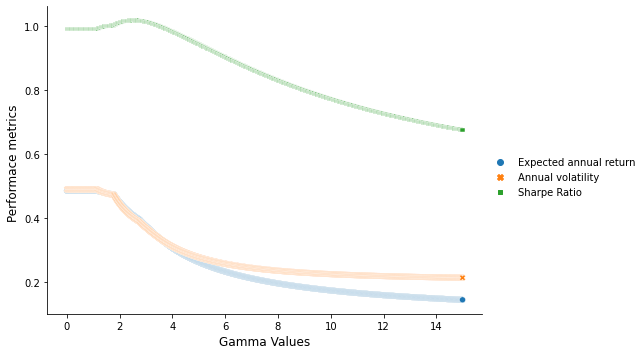

In [20]:
import seaborn as sns
g = sns.relplot(data = df , height=5, aspect=1.4)
g.set_titles("Performance metrics vs Gamma values", size = "12")
g.set_xlabels("Gamma Values", size = "12")
g.set_ylabels("Performace metrics ", size = "12")

In [34]:
optimal_gamma[0]

2.5509999999999997

In [22]:
optimal_gamma = df.loc[df['Sharpe Ratio'] == df['Sharpe Ratio'].max()].index

In [24]:
#Optimizing the portfolio using the above equation. 
from pypfopt.efficient_frontier import EfficientFrontier
ef = EfficientFrontier(returns, variance , weight_bounds=(0, 1))
ef.max_quadratic_utility(optimal_gamma[0])

#Getting the optimal weights from the optimization
weights = ef.clean_weights()

#Add weights to the weighs dataframe
weights_df["Optimal_Gamma"] = (list(weights.values()))
weights_df
    
plot_table(weights_df,layout_width = 500, index_title = "WEIGHTS" )

In [25]:
portfolio_performance["Optimal_Gamma"] = (list(ef.portfolio_performance(risk_free_rate=0)))
plot_table(portfolio_performance,layout_width = 550, index_title = "PERFORMANCE")

# Sharpe ratio Optimization : 

Objective function: 
$$   max \frac{w^{T}r_{p} - r_{f} }{\sqrt{w^{T} \Sigma w}}$$

Subject to Constraints : 

Budget constraint : Portfolio weights should add upto one :  $\sum_{i=1}^{n} w_{i} = 1$

No Short selling : $ w_{i} > = 0 $

The portfolio return should be positive : $w^{T} \mu > 0 $


In [26]:
#Optimizing the portfolio using the above equation. 
from pypfopt.efficient_frontier import EfficientFrontier
ef = EfficientFrontier(returns, variance , weight_bounds=(0, 1))
ef.max_sharpe(risk_free_rate=0)

#Getting the optimal weights from the optimization
weights = ef.clean_weights()

#Add weights to the weighs dataframe
weights_df["Sharpe"] = (list(weights.values()))
weights_df
    
plot_table(weights_df,layout_width = 400, index_title = "WEIGHTS" )

In [27]:
portfolio_performance["Sharpe"] = (list(ef.portfolio_performance(risk_free_rate=0)))
plot_table(portfolio_performance,layout_width = 550, index_title = "PERFORMANCE")

### Analysis : 
- Although the return of sharpe ratio optimization is less, the volatility has significantly reduced. This suggests that the Sharpe ratio optimiation gives a better result that mean variance optimization. 

# Sharpe ratio - Shorting allowed 

In [28]:
#Optimizing the portfolio using the above equation. 
from pypfopt.efficient_frontier import EfficientFrontier
ef = EfficientFrontier(returns, variance , weight_bounds=(-1, 1))
ef.max_sharpe(risk_free_rate=0)

#Getting the optimal weights from the optimization
weights = ef.clean_weights()

#Add weights to the weighs dataframe
weights_df["Sharpe_Shorted"] = (list(weights.values()))
weights_df
    
plot_table(weights_df,layout_width = 700, index_title = "WEIGHTS" )

In [29]:
portfolio_performance["Sharpe_Shorted"] = (list(ef.portfolio_performance(risk_free_rate=0)))
print ("beibff")
plot_table(portfolio_performance,layout_width = 700, index_title = "PERFORMANCE")

beibff


# Sector constraints 

In [30]:
sector_mapper = {
               "SHOP": "Tech",
               "AMZN": "Tech",
               "NVDA": "Semiconductors",
               "REGN": "Biotechnology",
               "NFLX": "Cable/Satellite TV",
               "CHTR": "Cable/Satellite TV",
               "BAC": "Banking",
               "JPM": "Banking",
                }


In [31]:
# We need to allocate atleast 30% to tech industry , atleast 20% to Banking industry 
sector_lower = {"Tech": 0.3, "Banking" : 0.2}  

# We can allocate a maximum of 50% to tech and 30% to Banking industry
sector_upper = {"Tech": 0.5, "Banking" : 0.3 }

In [32]:
#Optimizing the portfolio using the above equation. 
from pypfopt.efficient_frontier import EfficientFrontier
ef = EfficientFrontier(returns, variance , weight_bounds=(0, 1))
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.max_sharpe(risk_free_rate=0)

#Getting the optimal weights from the optimization
weights = ef.clean_weights()

#Add weights to the weighs dataframe
weights_df["Sector_limits"] = (list(weights.values()))
weights_df
    
plot_table(weights_df,layout_width = 700, index_title = "WEIGHTS" )

In [33]:
portfolio_performance["Sector_limits"] = (list(ef.portfolio_performance(risk_free_rate=0)))
plot_table(portfolio_performance,layout_width = 700, index_title = "PERFORMANCE")